In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = "abalone.csv"

In [3]:
df_raw = pd.read_csv(data)

print(df_raw.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [4]:
df_raw.shape

(4177, 9)

In [5]:
df_raw['age'] = df_raw['Rings'] + 1.5

In [6]:
df_raw.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [7]:
df_raw.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [8]:
df_raw

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [9]:
df_raw.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
age               float64
dtype: object

In [10]:
df_raw['Sex'].drop_duplicates()

0    M
2    F
4    I
Name: Sex, dtype: object

In [11]:
sex_encoder = {'I': 0,
               'M': 1,
               'F': 2
}

In [12]:
df_enc = df_raw.copy()

df_enc['sex_encoded'] = df_enc['Sex'].map(sex_encoder)

df_enc = df_enc.drop(columns=['Sex', 'Rings'], axis=0)


In [13]:
df_enc

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,sex_encoded
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5,0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,2
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,2


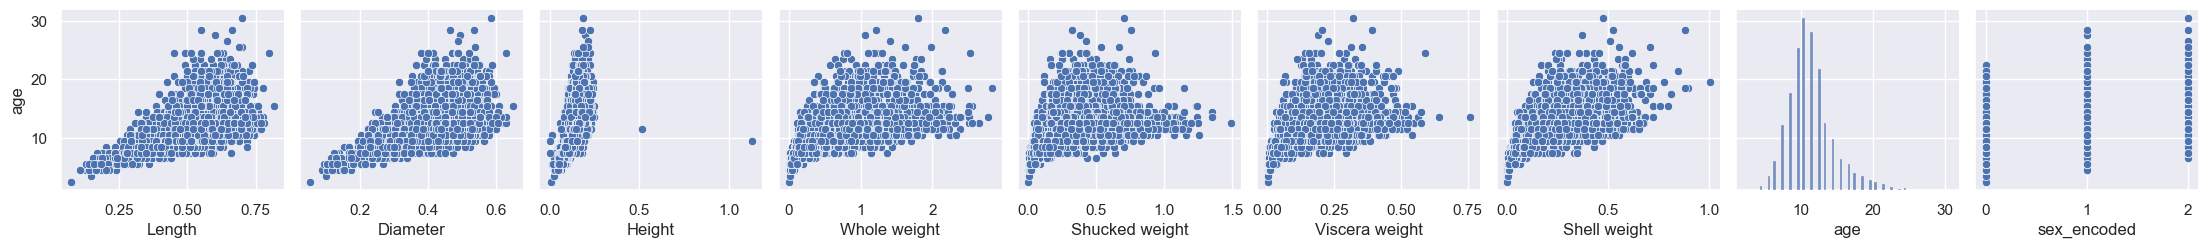

In [14]:
sns.set_theme(style='darkgrid')

sns.pairplot(df_enc, y_vars = 'age')

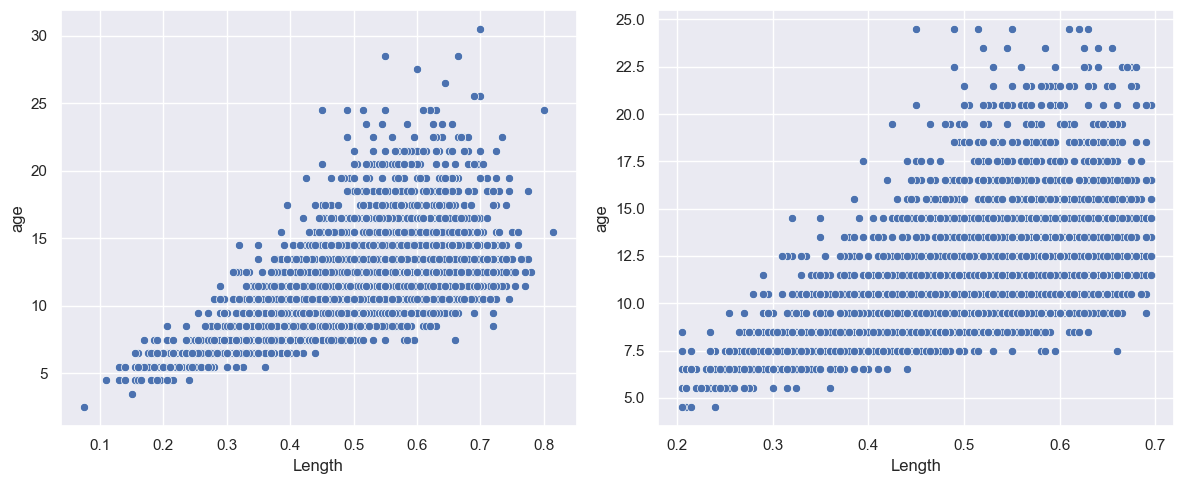

In [15]:
df_enc_filtered = df_enc.copy()

column = 'Length'

fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=df_enc,x=df_enc[column], y=df_enc['age'], ax=axes[0])

df_enc_filtered = df_enc[(df_enc['Length'] > 0.2) & (df_enc['Length'] < 0.7)]
df_enc_filtered = df_enc_filtered[df_enc_filtered['age'] < 25]

sns.scatterplot(data=df_enc_filtered,x=df_enc_filtered[column], y=df_enc_filtered['age'], ax=axes[1])

plt.tight_layout()
plt.show()


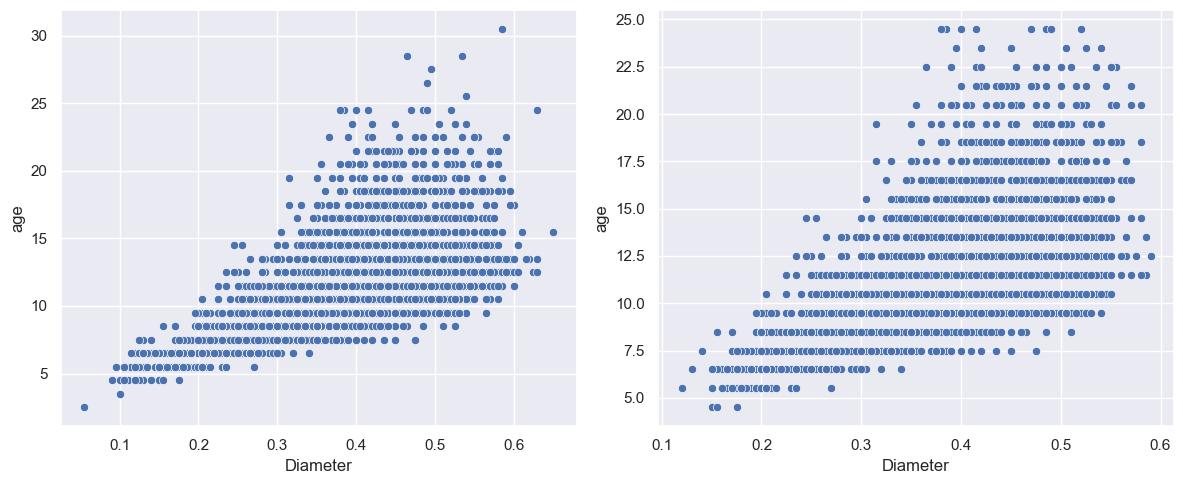

In [16]:
column = 'Diameter'

fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=df_enc,x=df_enc[column], y=df_enc['age'], ax=axes[0])

sns.scatterplot(data=df_enc_filtered,x=df_enc_filtered[column], y=df_enc_filtered['age'], ax=axes[1])

plt.tight_layout()
plt.show()


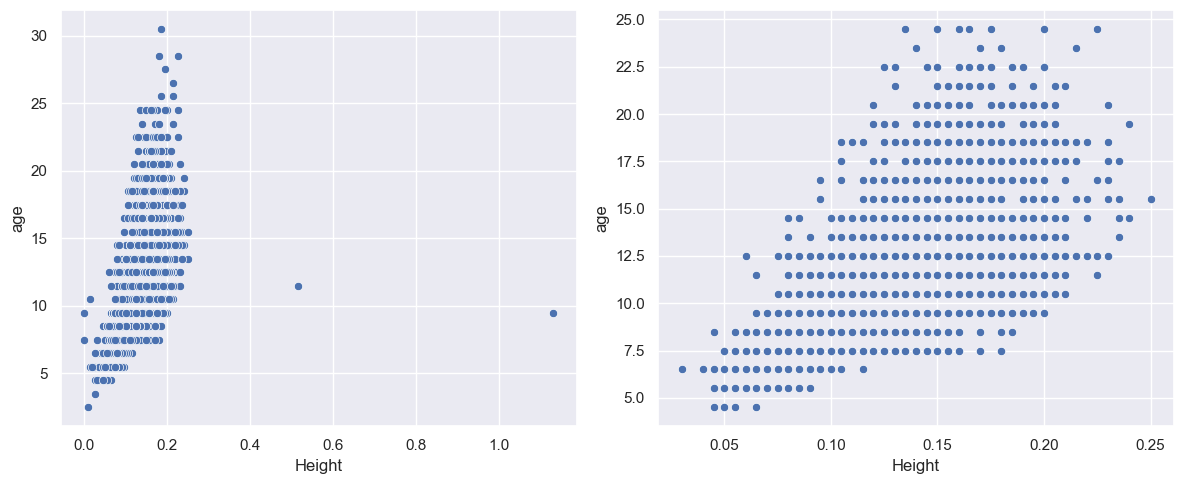

In [17]:
column = 'Height'

fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=df_enc,x=df_enc[column], y=df_enc['age'], ax=axes[0])

df_enc_filtered = df_enc_filtered[(df_enc_filtered['Height'] < 0.4) & (df_enc_filtered['Height'] > 0.0)]
df_enc_filtered = df_enc_filtered[~((df_enc_filtered['age'] > 10) & (df_enc_filtered['Height'] < 0.05))]

sns.scatterplot(data=df_enc_filtered,x=df_enc_filtered[column], y=df_enc_filtered['age'], ax=axes[1])

plt.tight_layout()
plt.show()


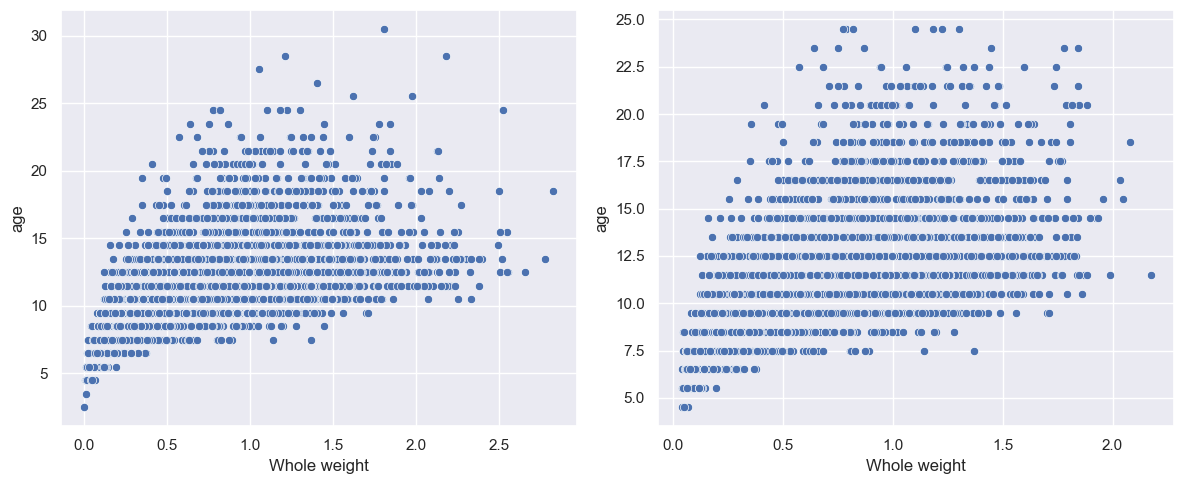

In [18]:
column = 'Whole weight'

fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=df_enc,x=df_enc[column], y=df_enc['age'], ax=axes[0])

# df_enc_filtered = df_enc_filtered[~((df_enc_filtered['age'] > 22.5) & (df_enc_filtered[column] > 2))]

sns.scatterplot(data=df_enc_filtered,x=df_enc_filtered[column], y=df_enc_filtered['age'], ax=axes[1])

plt.tight_layout()
plt.show()


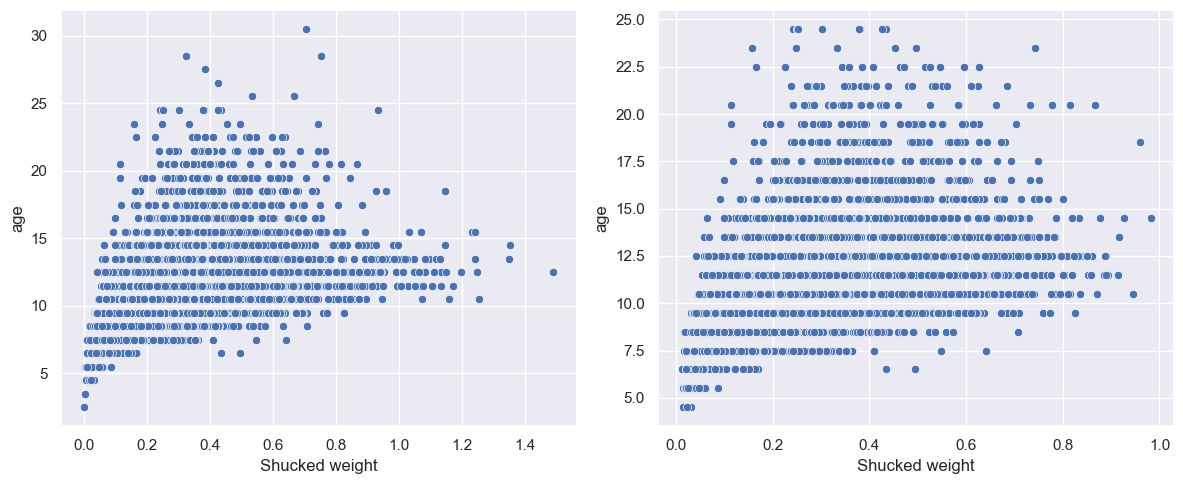

In [19]:
column = 'Shucked weight'

fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=df_enc,x=df_enc[column], y=df_enc['age'], ax=axes[0])

df_enc_filtered = df_enc_filtered[~(df_enc_filtered[column] > 1)]

sns.scatterplot(data=df_enc_filtered,x=df_enc_filtered[column], y=df_enc_filtered['age'], ax=axes[1])

plt.tight_layout()
plt.show()


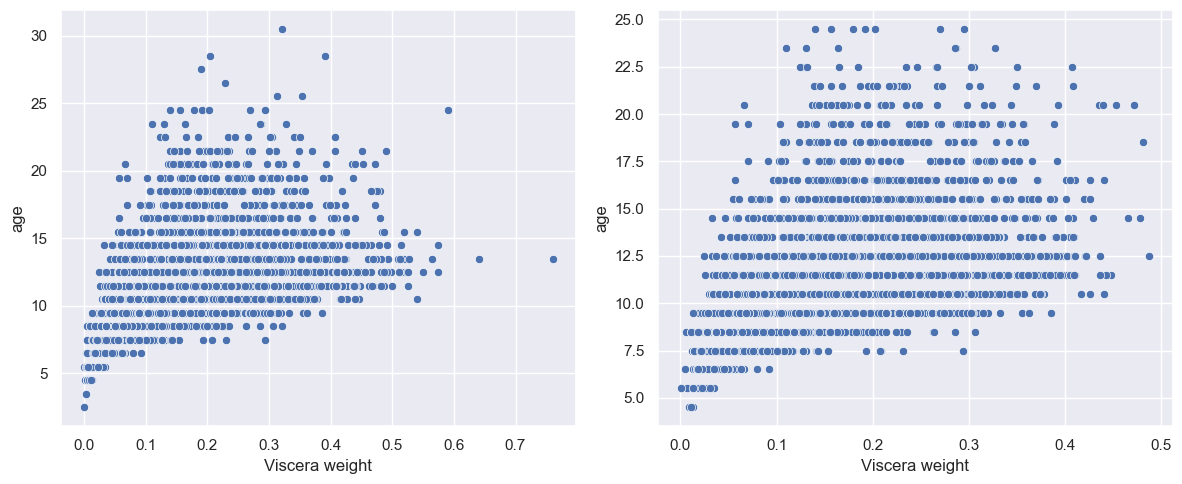

In [20]:
column = 'Viscera weight'

fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=df_enc,x=df_enc[column], y=df_enc['age'], ax=axes[0])

df_enc_filtered = df_enc_filtered[~(df_enc_filtered[column] > 0.5)]

sns.scatterplot(data=df_enc_filtered,x=df_enc_filtered[column], y=df_enc_filtered['age'], ax=axes[1])

plt.tight_layout()
plt.show()


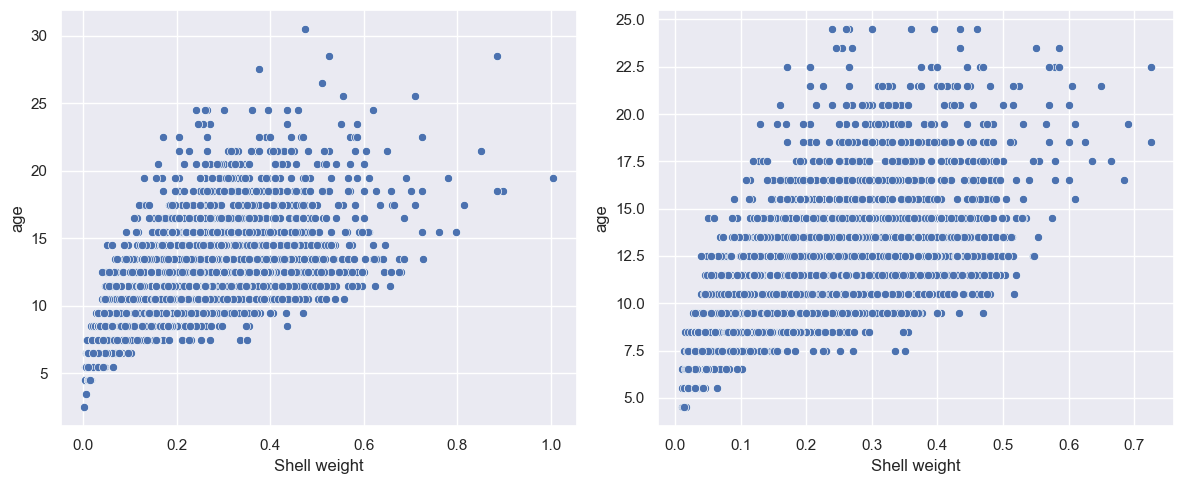

In [21]:
column = 'Shell weight'

fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=df_enc,x=df_enc[column], y=df_enc['age'], ax=axes[0])

df_enc_filtered = df_enc_filtered[~(df_enc_filtered[column] > 0.8)]
df_enc_filtered = df_enc_filtered[~((df_enc_filtered[column] > 0.6) & (df_enc_filtered['age'] < 15 ))]

sns.scatterplot(data=df_enc_filtered,x=df_enc_filtered[column], y=df_enc_filtered['age'], ax=axes[1])

plt.tight_layout()
plt.show()

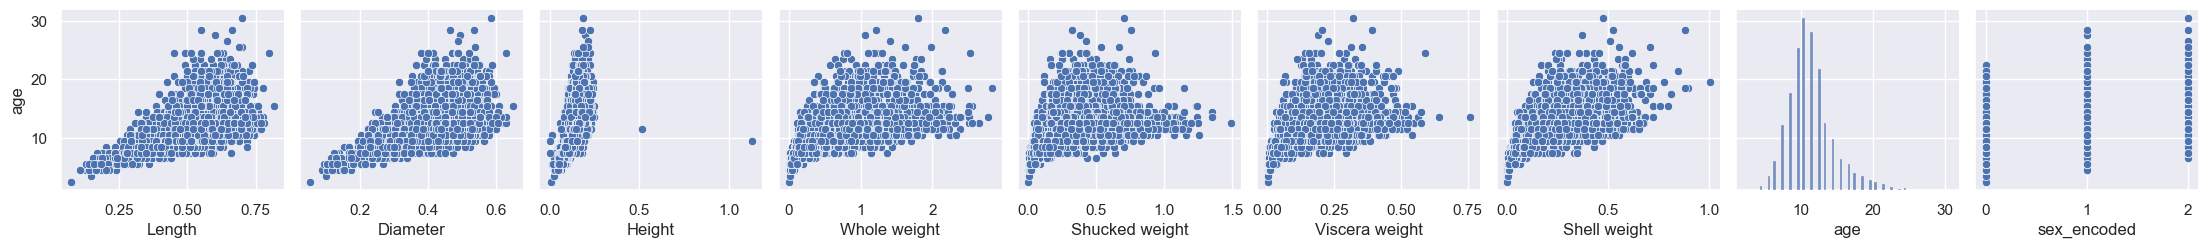

In [22]:
sns.set_theme(style='darkgrid')

sns.pairplot(df_enc, y_vars = 'age')

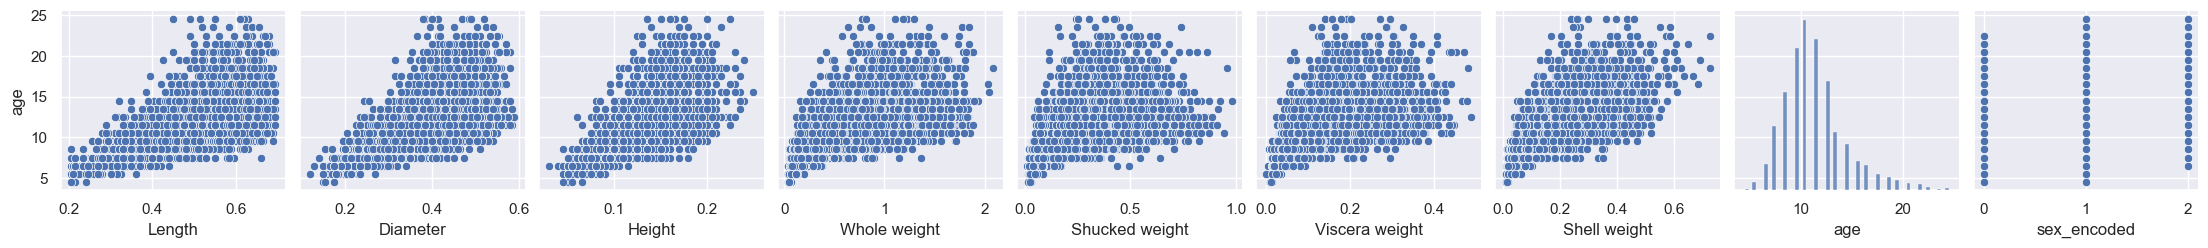

In [23]:
sns.set_theme(style='darkgrid')

sns.pairplot(df_enc_filtered, y_vars = 'age')

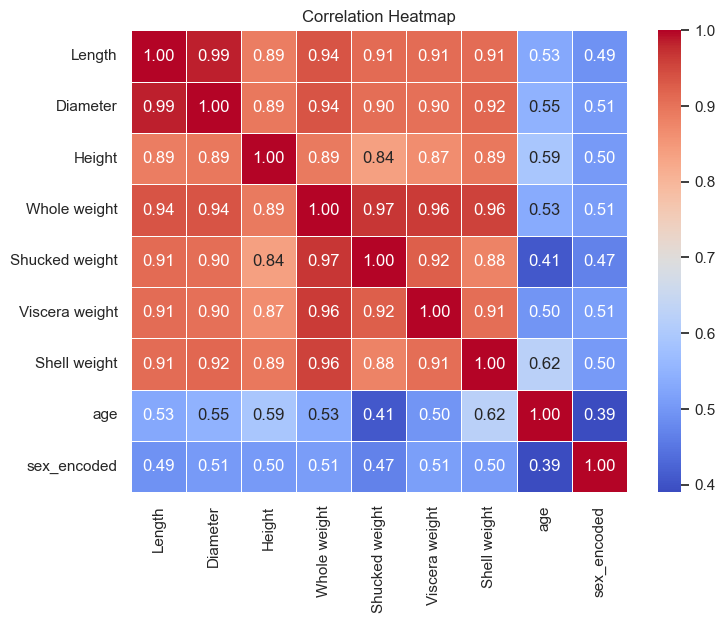

In [24]:
matrix = df_enc_filtered.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True, cmap="coolwarm",fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt

In [26]:
df_enc_filtered.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'sex_encoded'],
      dtype='object')

In [27]:
X = df_enc_filtered[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'sex_encoded']]
y = df_enc_filtered['age']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [29]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


# List of all the pipeline
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors"}



In [30]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [31]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 2.140020 
Lasso: 2.629500 
DecisionTree: 2.997053 
RandomForest: 2.128892 
KNeighbors: 2.265397 


In [32]:
rms_2 = []
for i, model in enumerate(pipelines):
    preds = model.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, preds))
    print(f"Model {model} RMSE: {rms}")


Model Pipeline(steps=[('scalar1', StandardScaler()), ('lr', LinearRegression())]) RMSE: 2.1281843300126004
Model Pipeline(steps=[('scalar2', StandardScaler()), ('lasso', Lasso())]) RMSE: 2.5445605794040844
Model Pipeline(steps=[('scalar3', StandardScaler()), ('dt', DecisionTreeRegressor())]) RMSE: 2.9657082909635966
Model Pipeline(steps=[('scalar4', StandardScaler()), ('rf', RandomForestRegressor())]) RMSE: 2.111451923417794
Model Pipeline(steps=[('scalar5', StandardScaler()), ('kn', KNeighborsRegressor())]) RMSE: 2.2192985143524204


In [33]:
pred = pipeline_rf.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.5043065745298765
Adjusted R^2: 0.4992094698977929


Engenharia de Feature

In [66]:
df_new_features = df_enc_filtered.copy()

# df_new_features['length_to_diameter'] = df_new_features['Length'] / df_new_features['Diameter']
# df_new_features['height_to_length'] = df_new_features['Height'] / df_new_features['Length']
df_new_features['volume_approx'] = df_new_features['Length'] * df_new_features['Diameter'] * df_new_features['Height']
# df_new_features['shucked_ratio'] = df_new_features['Shucked weight'] / df_new_features['Whole weight']
# df_new_features['viscera_ratio'] = df_new_features['Viscera weight'] / df_new_features['Whole weight']
# df_new_features['shell_ratio'] = df_new_features['Shell weight'] / df_new_features['Whole weight']
df_new_features['is_heavy'] = df_new_features['Whole weight'] > df_new_features['Whole weight'].median()
df_new_features['is_tall'] = df_new_features['Height'] > df_new_features['Height'].median()
df_new_features['log_length'] = np.log(df_new_features['Length'] + 1)
df_new_features['sqrt_weight'] = np.sqrt(df_new_features['Whole weight'])
df_new_features['shell_by_sex'] = df_new_features['Shell weight'] * df_new_features['sex_encoded']
# df_new_features['length_by_sex'] = df_new_features['Length'] * df_new_features['sex_encoded']


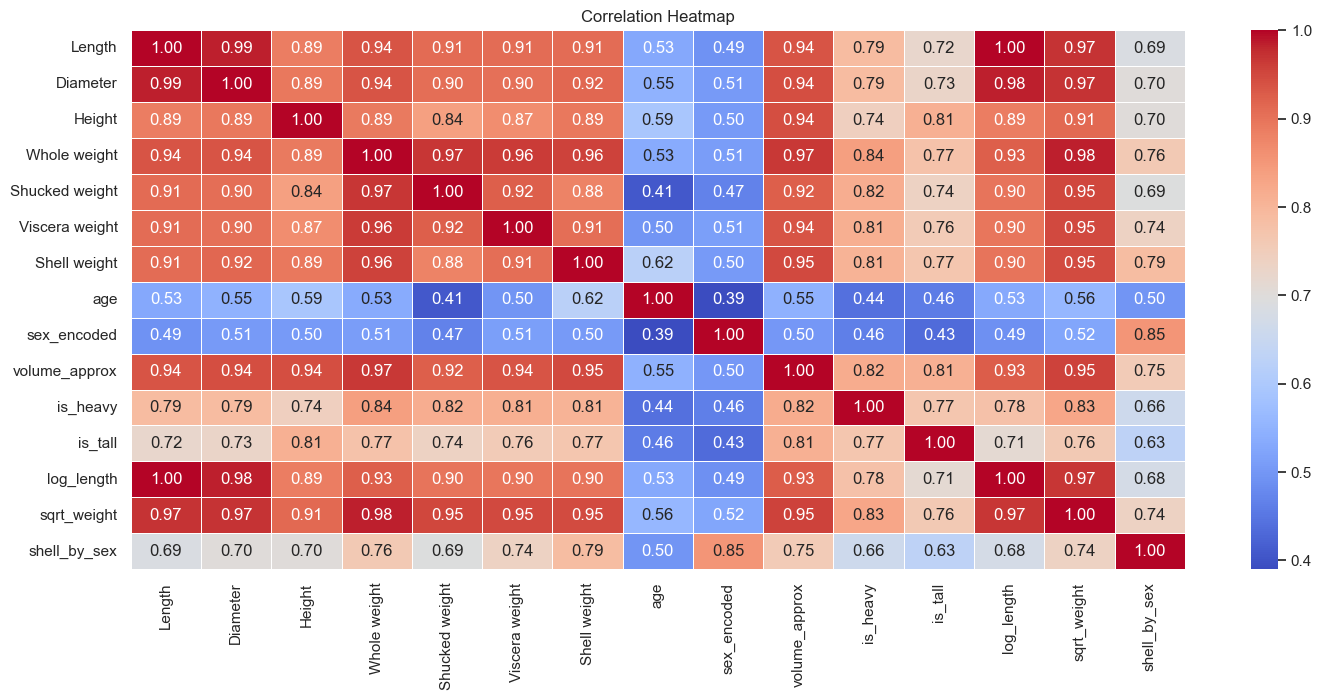

In [72]:
matrix = df_new_features.corr()

plt.figure(figsize=(17,7))
sns.heatmap(matrix,annot=True, cmap="coolwarm",fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [73]:
# X = df_new_features[['Length', 'Diameter', 'Height', 'Shell weight', 'volume_approx','log_length', 'sqrt_weight']]
X = df_new_features.drop(columns=['age'], axis=1)
y = df_enc_filtered['age']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=25)

for pipe in pipelines:
    pipe.fit(X_train, y_train)


In [75]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 2.113558 
Lasso: 2.619996 
DecisionTree: 3.030556 
RandomForest: 2.186667 
KNeighbors: 2.295081 


In [76]:
pred = pipeline_rf.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.5201784192970627
Adjusted R^2: 0.5167353121059601
